# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out required information
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        continue

    # pause to avoid rate limiting
    time.sleep(1)

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 1 | yellowknife
Processing Record 1 of Set 1 | iskateley
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | itamaraca
Processing Record 4 of Set 1 | haiku-pauwela
Processing Record 5 of Set 1 | le vauclin
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | palikir - national government center
Processing Record 10 of Set 1 | mount isa
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | kloulklubed
Processing Record 13 of Set 1 | zhangjiakou
Processing Record 14 of Set 1 | malango
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | kirkwall
Processing Record 17 of Set 1 | palu
Processing Record 18 of Set 1 | nar'yan-mar
Processing Record 19 of Set 1 | bayan nur
City not found. Skipping... Error: 'coord'
Processing Record 20 of Set 1 | na

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,14.37,62,100,1.67,CA,1724966117
1,iskateley,67.6803,53.1512,7.04,67,96,6.75,RU,1724966118
2,blackmans bay,-43.0167,147.3167,11.07,78,70,0.89,AU,1724966120
3,itamaraca,-7.7478,-34.8256,23.77,81,71,6.61,BR,1724966121
4,haiku-pauwela,20.9219,-156.3051,29.54,77,40,10.29,US,1724966122


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,14.37,62,100,1.67,CA,1724966117
1,iskateley,67.6803,53.1512,7.04,67,96,6.75,RU,1724966118
2,blackmans bay,-43.0167,147.3167,11.07,78,70,0.89,AU,1724966120
3,itamaraca,-7.7478,-34.8256,23.77,81,71,6.61,BR,1724966121
4,haiku-pauwela,20.9219,-156.3051,29.54,77,40,10.29,US,1724966122


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

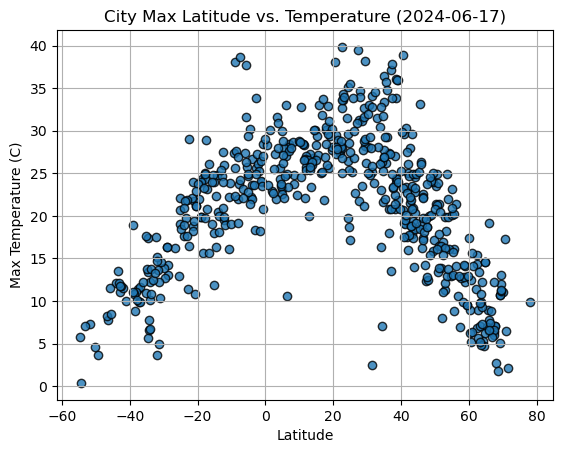

In [47]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1A.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

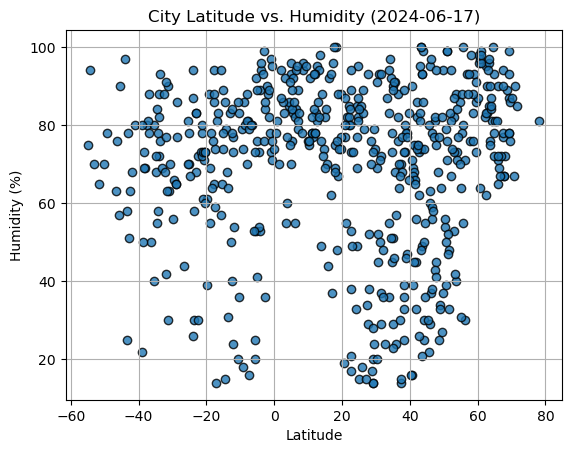

In [48]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2A.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

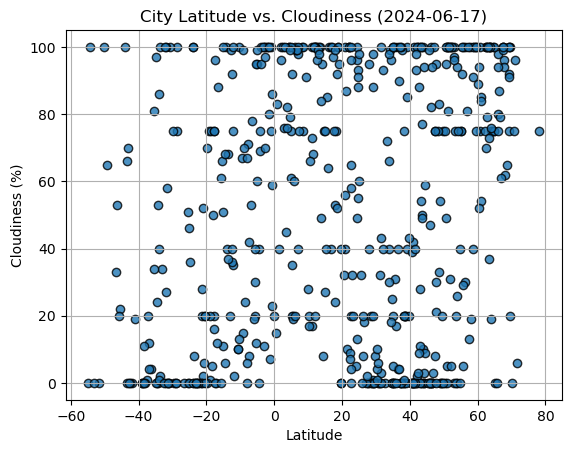

In [49]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3A.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

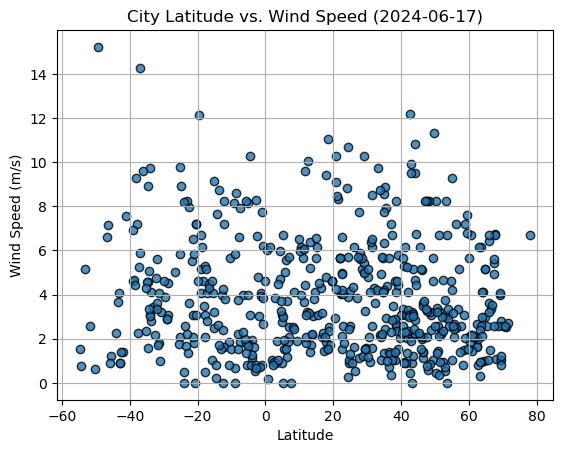

In [50]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4A.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,14.37,62,100,1.67,CA,1724966117
1,iskateley,67.6803,53.1512,7.04,67,96,6.75,RU,1724966118
4,haiku-pauwela,20.9219,-156.3051,29.54,77,40,10.29,US,1724966122
5,le vauclin,14.5452,-60.8388,30.03,74,75,4.12,MQ,1724966123
9,palikir - national government center,6.9248,158.1611,28.47,89,40,2.06,FM,1724966129


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,11.07,78,70,0.89,AU,1724966120
3,itamaraca,-7.7478,-34.8256,23.77,81,71,6.61,BR,1724966121
6,grytviken,-54.2811,-36.5092,0.37,94,100,0.75,GS,1724966125
7,lebu,-37.6167,-73.6500,11.39,80,1,2.26,CL,1724966126
8,bredasdorp,-34.5322,20.0403,5.59,84,0,1.60,ZA,1724966127


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5053145972200036


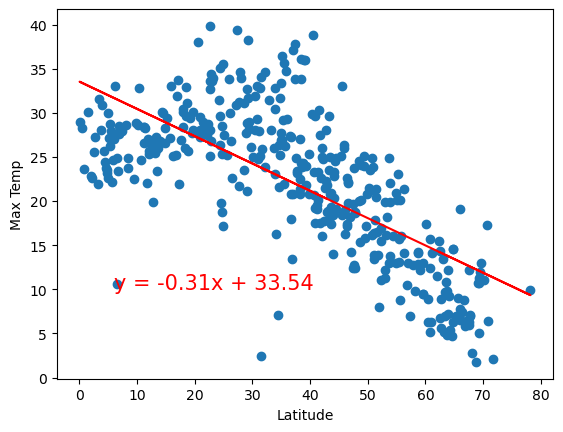

In [54]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Max Temp"
text_coordinates = (6, 10)
plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-squared is: 0.6811169326764124


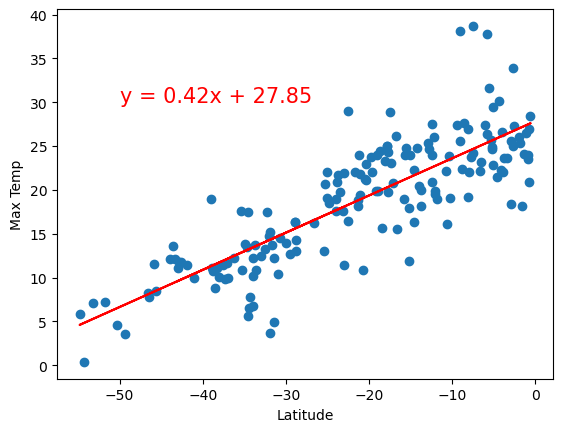

In [55]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "Max Temp" 
text_coordinates = (-50, 30)
plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** YOUR RESPONSE 

### Temperature:
Latitude has a significant impact on temperature in both hemispheres. As you move away from the equator towards the poles, temperatures generally decrease. This is because areas near the equator receive more direct sunlight year-round, while higher latitudes receive sunlight at a more oblique angle, spreading the solar energy over a larger area. The equatorial regions tend to have consistently warm temperatures, while areas closer to the poles experience more extreme seasonal variations. This is evident in the linear relationship between temperature and latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 1.996781677065499e-05


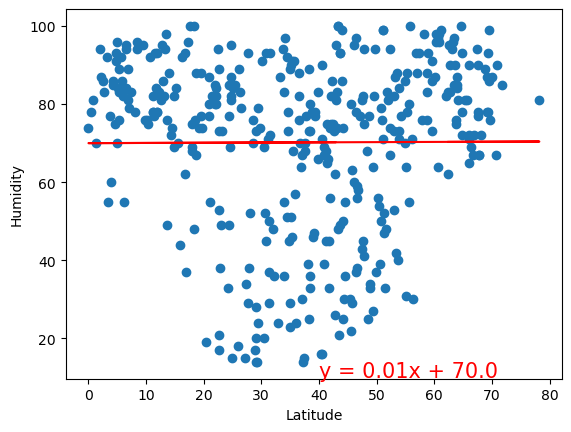

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = "Humidity"
text_coordinates = (40, 10)
plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-squared is: 0.0010829187311499244


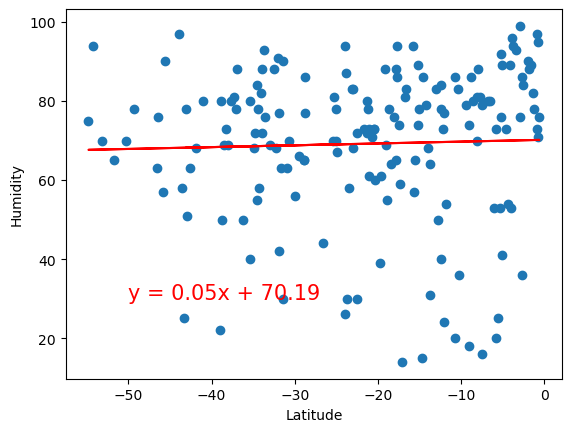

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
title = "Humidity"
text_coordinates = (-50, 30)
plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity:
Hu#idity is generally higher near the equator and decreases as you move towards the poles. The equatorial regions receive more solar energy, leading to increased evaporation and higher water vapor content in the air. The intertropical convergence zone (ITCZ) near the equator is characterized by low pressure, rising warm air, and high humidity, often resulting in frequent precipitation. This is evident in the linear relationship between humitidy and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0005965998837033559


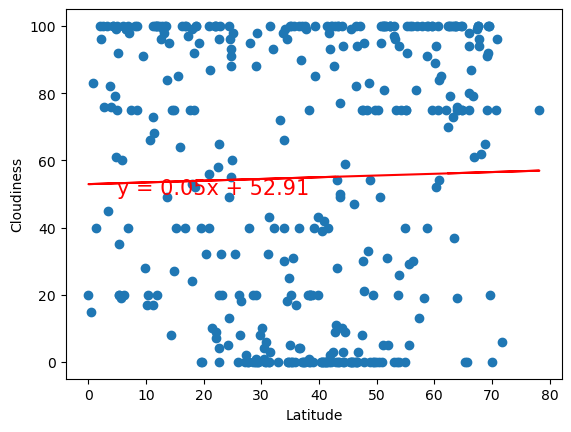

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
title = "Cloudiness"
text_coordinates = (5, 50)
plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-squared is: 0.08731996810220458


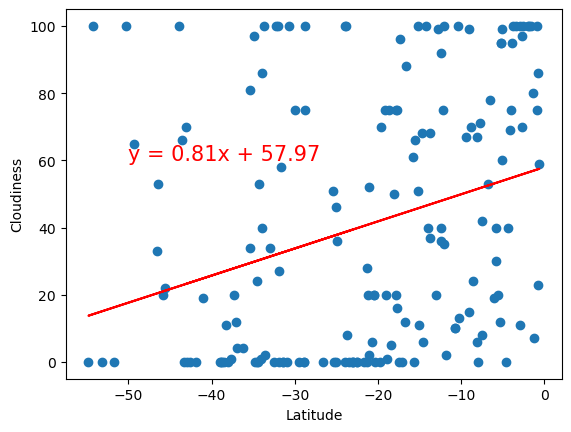

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness'] 
title = "Cloudiness"
text_coordinates = (-50, 60)
plot_linear_regression(x_values, y_values, title, text_coordinates)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness:
Cloud formation is closely related to humidity and atmospheric circulation patterns. The equatorial regions, with their high humidity and rising air, tend to have more cloud cover. The ITCZ is often marked by a band of persistent clouds. As you move towards the mid-latitudes (around 30° North and South), you encounter areas of descending dry air, which leads to clearer skies and less cloud cover. This pattern contributes to the formation of many of the world's deserts at these latitudes. This is evident in the linear relationship between cloudiness and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.012169487472556806


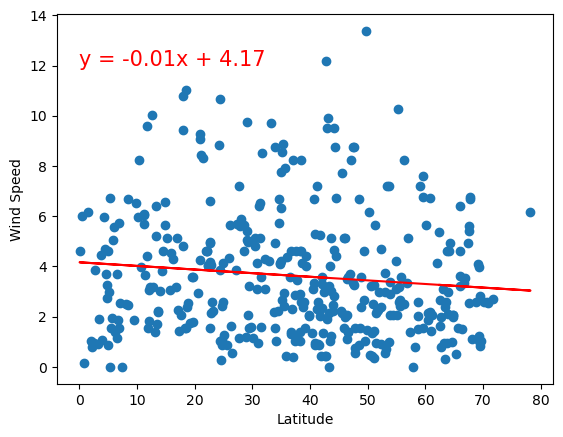

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
title = "Wind Speed"
text_coordinates = (0, 12)
plot_linear_regression(x_values, y_values, title, text_coordinates)

The r-squared is: 0.010908145336489941


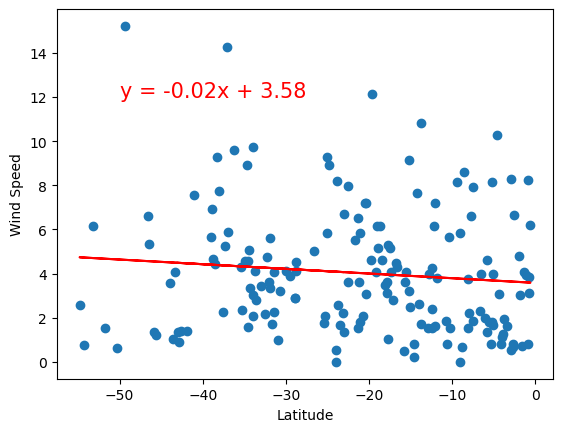

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
title = "Wind Speed"
text_coordinates = (-50, 12)
plot_linear_regression(x_values, y_values, title, text_coordinates)


**Discussion about the linear relationship:**

### Wind Speed:
Wind patterns are influenced by the uneven heating of the Earth's surface and the planet's rotation. The general pattern includes trade winds near the equator, westerlies in the mid-latitudes, and polar easterlies near the poles. Wind speeds can vary significantly with latitude, but there isn't a simple linear relationship. Factors such as pressure gradients, the Coriolis effect, and local topography all play roles in determining wind speed and direction at different latitudes. This is evident in the linear relationship between wid speed and latitude. 

It's important to note that while these general patterns hold true for both hemispheres, there are some differences due to the distribution of land and water masses. The Northern Hemisphere, with its larger land area, tends to have more extreme temperature variations compared to the Southern Hemisphere, which is dominated by oceans that moderate temperature changes. Additionally, local factors such as ocean currents, altitude, and proximity to large bodies of water can significantly modify these latitude-based patterns, creating regional and local climate variations.